#### Collecting data from API

In [41]:
import requests
import pandas as pd 

baseurl = "https://data.cityofchicago.org/resource/6zsd-86xi.json"

r = requests.get(baseurl)

print(r)

<Response [200]>


In [42]:
if r.status_code == 200:
    crime_data = r.json()
    
    crime_df = pd.DataFrame(crime_data)
    
    print(crime_df.head(2)) 
else:
    print("Failed to fetch data from the API.")

         id case_number                     date                block  iucr  \
0  13355224    JH136257  2024-02-01T00:00:00.000  043XX S CALUMET AVE  1310   
1  13356817    JH138269  2024-02-01T00:00:00.000      039XX W 49TH ST  0560   

      primary_type  description location_description  arrest  domestic  ...  \
0  CRIMINAL DAMAGE  TO PROPERTY            APARTMENT   False      True  ...   
1          ASSAULT       SIMPLE            APARTMENT   False      True  ...   

  location_zip :@computed_region_awaf_s7ux :@computed_region_6mkv_f3dw  \
0                                       12                        4301   
1                                       49                       22248   

  :@computed_region_vrxf_vc4k :@computed_region_bdys_3d7i  \
0                           4                         162   
1                          54                         698   

  :@computed_region_43wa_7qmu :@computed_region_rpca_8um6  \
0                           9                          3

In [43]:
crime_df.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58,:@computed_region_8hcu_yrd4
0,13355224,JH136257,2024-02-01T00:00:00.000,043XX S CALUMET AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,...,,12,4301,4,162,9,36,24,98,8
1,13356817,JH138269,2024-02-01T00:00:00.000,039XX W 49TH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,,49,22248,54,698,8,56,13,103,14
2,13355785,JH136895,2024-02-01T00:00:00.000,050XX W WRIGHTWOOD AVE,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,...,,7,22615,19,304,17,2,6,176,31
3,13359284,JH141376,2024-02-01T00:00:00.000,100XX W BALMORAL AVE,0810,THEFT,OVER $500,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,False,False,...,,34,16197,75,NaN,29,38,12,40,41
4,13355654,JH136725,2024-02-01T00:00:00.000,043XX W 26TH ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,,14,21569,32,205,28,57,21,167,22


#### Preprocessing

In [44]:
print(crime_df.dtypes)

id                             object
case_number                    object
date                           object
block                          object
iucr                           object
primary_type                   object
description                    object
location_description           object
arrest                           bool
domestic                         bool
beat                           object
district                       object
ward                           object
community_area                 object
fbi_code                       object
x_coordinate                   object
y_coordinate                   object
year                           object
updated_on                     object
latitude                       object
longitude                      object
location                       object
location_address               object
location_city                  object
location_state                 object
location_zip                   object
:@computed_r

In [45]:
selected_columns = [
    'id', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 
    'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 
    'community_area', 'fbi_code', 'year', 
    'updated_on', 'latitude', 'longitude', 'location_address', 
    'location_city', 'location_state', 'location_zip'
]


new_crime_df = crime_df[selected_columns].copy()


data_types = {
    'id': 'int',
    'case_number': 'string',
    'date': 'datetime64[ns]', # Convert to datetime data type
    'block': 'string',
    'iucr': 'string',
    'primary_type': 'string',
    'description': 'string',
    'location_description': 'string',
    'arrest': 'bool',
    'domestic': 'bool',
    'beat': 'string',
    'district': 'string',
    'ward': 'object',
    'community_area': 'string',
    'fbi_code': 'object',
    'year': 'object',
    'updated_on': 'datetime64[ns]',  # Convert to datetime data type
    'latitude': 'float64',  # Convert to float data type
    'longitude': 'float64', 
    'location_address': 'string',
    'location_city': 'string',
    'location_state': 'string',
    'location_zip': 'string'
}

new_crime_df= new_crime_df.astype(data_types)

# Display the data types of the new DataFrame
print(new_crime_df.dtypes)


id                               int32
case_number                     string
date                    datetime64[ns]
block                           string
iucr                            string
primary_type                    string
description                     string
location_description            string
arrest                            bool
domestic                          bool
beat                            string
district                        string
ward                            object
community_area                  string
fbi_code                        object
year                            object
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location_address                string
location_city                   string
location_state                  string
location_zip                    string
dtype: object


In [46]:
# Checking for missing values
missing_values = new_crime_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                      0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    1
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
year                    0
updated_on              0
latitude                8
longitude               8
location_address        8
location_city           8
location_state          8
location_zip            8
dtype: int64


In [47]:
# Checking for missing values
missing_values = new_crime_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                      0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    1
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
year                    0
updated_on              0
latitude                8
longitude               8
location_address        8
location_city           8
location_state          8
location_zip            8
dtype: int64


In [48]:
import pandas as pd

# Assuming df is your DataFrame and 'date' is the column containing the date and time
# Convert the 'date' column to datetime format first
new_crime_df['date'] = pd.to_datetime(new_crime_df['date'])

# Separate date and time into new columns
new_crime_df['date_only'] = new_crime_df['date'].dt.date
new_crime_df['time_only'] = new_crime_df['date'].dt.time




In [49]:
new_crime_df.drop(columns=['location_address', 'location_city', 'location_state', 'location_zip'], inplace=True)

In [50]:
new_crime_df.dropna(inplace=True)

In [31]:
new_crime_df.head(5)

,id,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,date_only,time_only
0,13355638,JH136687,053XX N MELVINA AVE,0650,BURGLARY,HOME INVASION,RESIDENCE,False,False,1622,016,45,11,05,2024,2024-02-08 15:42:01,41.978374,-87.783583,2024-02-01,00:00:00
1,13357837,JH139469,016XX E 78TH ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,True,0414,004,8,43,08A,2024,2024-02-08 15:42:01,41.753323,-87.584087,2024-02-01,00:00:00
2,13357359,JH138981,120XX S PERRY AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,0523,005,9,53,02,2024,2024-02-08 15:42:01,41.675427,-87.624989,2024-02-01,00:00:00
3,13354929,JH136001,062XX N HERMITAGE AVE,0920,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,2433,024,40,77,07,2024,2024-02-08 15:42:01,41.994832,-87.673416,2024-02-01,00:00:00
4,13359634,JH141565,061XX N WASHTENAW AVE,1120,DECEPTIVE PRACTICE,FORGERY,APARTMENT,False,False,2413,024,40,2,10,2024,2024-02-08 15:42:01,41.992787,-87.697042,2024-02-01,00:00:00


#### Visualization

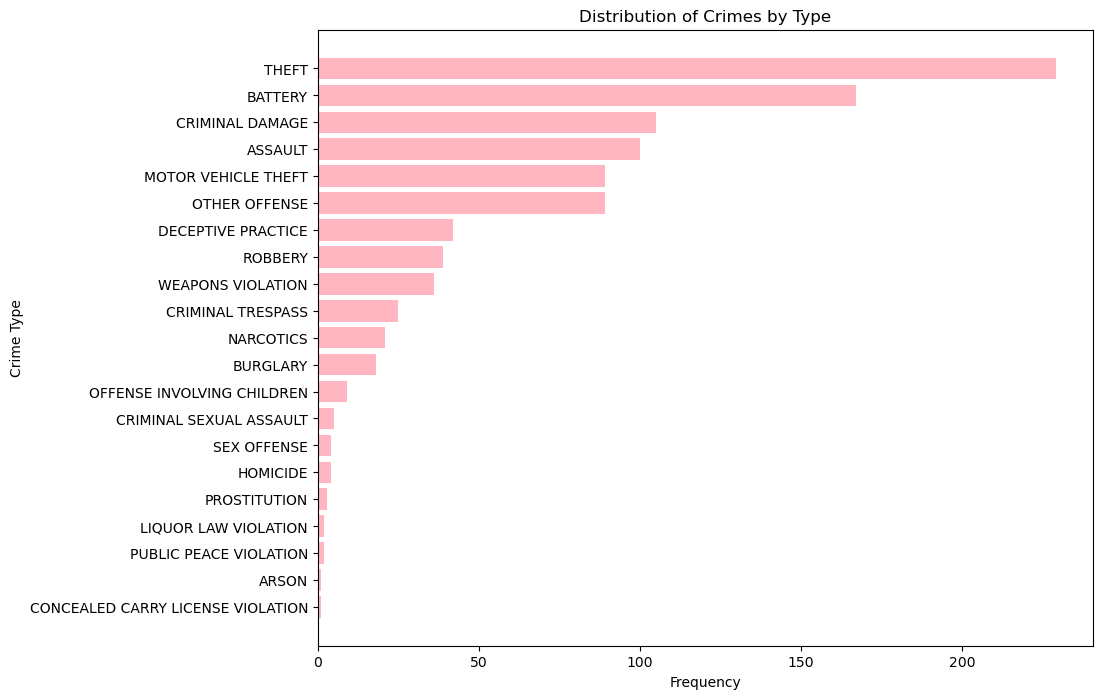

In [32]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
crime_type_counts = new_crime_df['primary_type'].value_counts()
crime_type_counts_sorted = crime_type_counts.sort_values(ascending=True)  # Sort the counts in ascending order

plt.barh(crime_type_counts_sorted.index, crime_type_counts_sorted.values, color='lightpink')
plt.title('Distribution of Crimes by Type')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
plt.show()


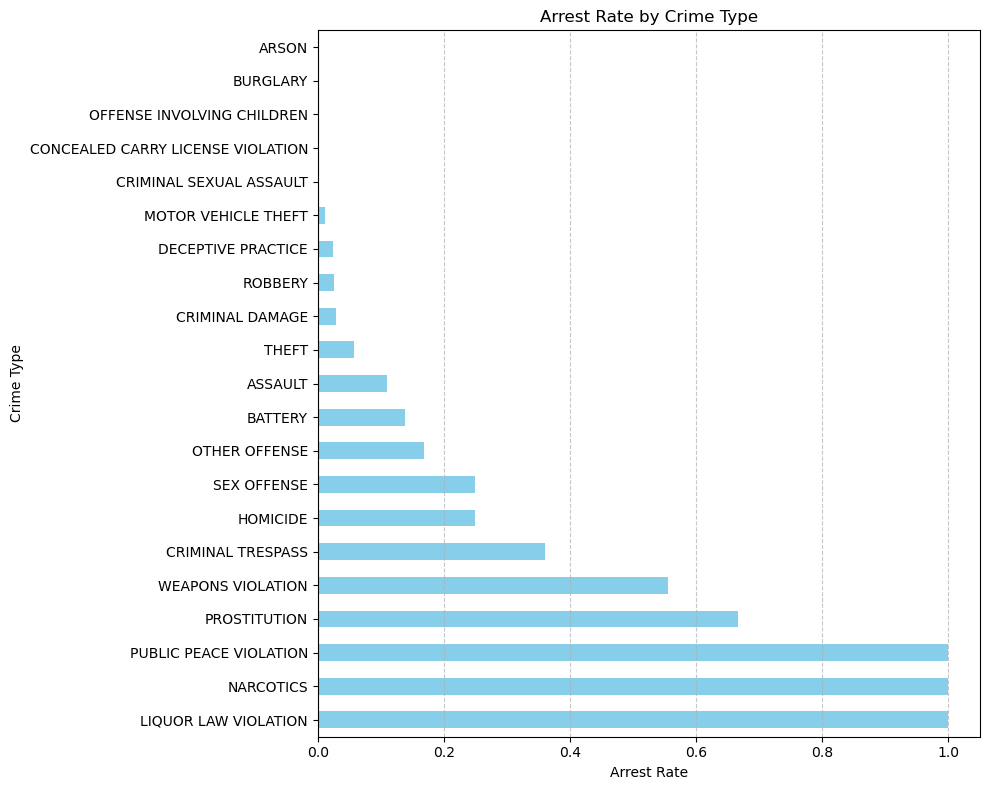

In [33]:
plt.figure(figsize=(10, 8))
arrest_rate = new_crime_df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False)
arrest_rate.plot(kind='barh', color='skyblue')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Arrest Rate')
plt.ylabel('Crime Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
import folium
# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Add crime locations as circle markers to the map
for index, row in new_crime_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        fill=True,
        fill_opacity=0.6,
        color='red',
        fill_color='red',
        tooltip=f"{row['primary_type']}: {row['description']}"
    ).add_to(chicago_map)

# Display the map
chicago_map


In [35]:
import folium
from folium.plugins import HeatMap

# Create a map centered around Chicago
crime_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add heatmap layer
heat_data = crime_df_C[['latitude', 'longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=10).add_to(crime_map)

# Display the map
crime_map

NameError: name 'crime_df_C' is not defined

In [ ]:
import folium

# Define the types of crimes you want to plot
crime_types = ['ASSAULT', 'THEFT', 'BATTERY']

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# Define colors for each type of crime
colors = {'ASSAULT': 'red', 'THEFT': 'blue', 'BATTERY': 'green'}

# Add crime locations as circle markers to the map
for crime_type in crime_types:
    crime_df = new_crime_df[new_crime_df['primary_type'] == crime_type]
    for index, row in crime_df.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            fill=True,
            fill_opacity=0.6,
            color=colors[crime_type],
            fill_color=colors[crime_type],
            tooltip=f"{row['primary_type']}: {row['description']}"
        ).add_to(chicago_map)

# Display the map
chicago_map


In [ ]:
import matplotlib.pyplot as plt
theft_df = new_crime_df[new_crime_df['primary_type'] == 'THEFT']

description_counts = theft_df['description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(description_counts, labels=description_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Descriptions for Theft')
plt.axis('equal')  
plt.show()


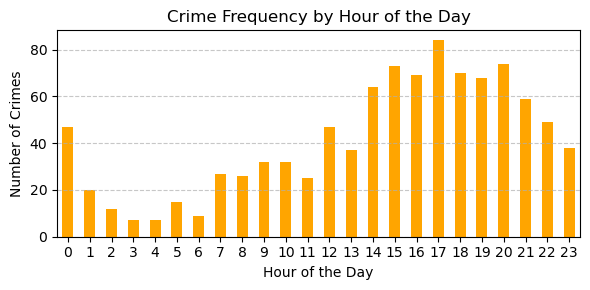

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'date_only' is the name of the column containing date strings
#new_crime_df['date_only'] = pd.to_datetime(new_crime_df['date_only'])

# Extract hour component from the 'date' column
new_crime_df['hour_of_day'] = new_crime_df['date'].dt.hour

# Plotting crime frequency by hour of the day
plt.figure(figsize=(6, 3))
new_crime_df['hour_of_day'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Crime Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


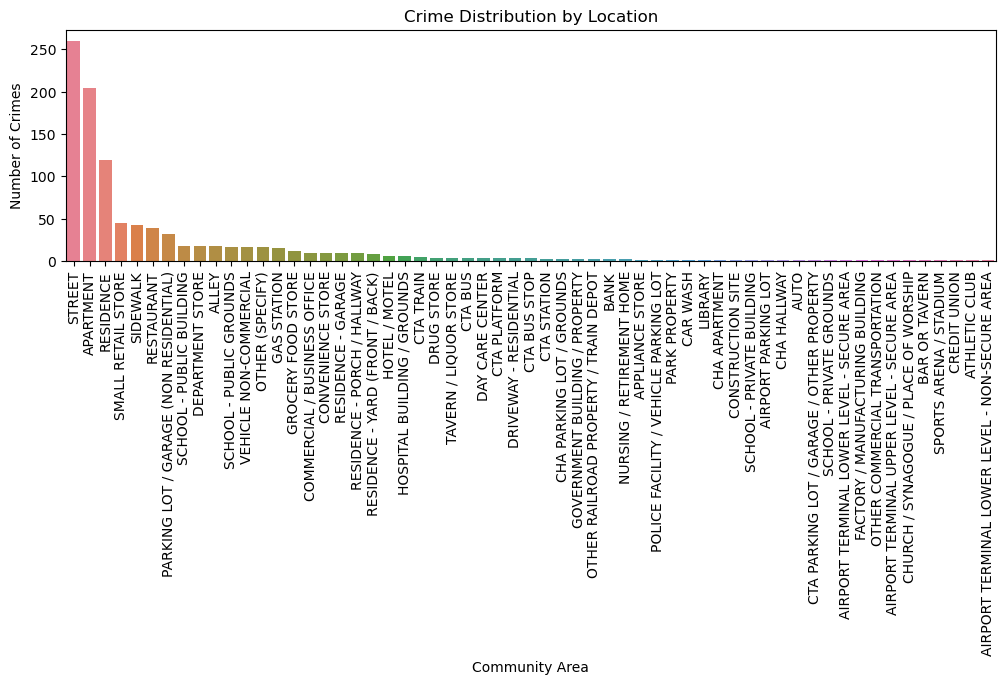

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your seaborn code here

# Count the occurrences of crimes by community area
crime_count_by_community = new_crime_df['location_description'].value_counts()

# Plot crime distribution by community area
plt.figure(figsize=(12, 3))
sns.barplot(x=crime_count_by_community.index, y=crime_count_by_community.values, palette='husl')
plt.title('Crime Distribution by Location')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()
